In [1]:
import json
import pandas as pd
from sklearn import ensemble, preprocessing, metrics
from sklearn.model_selection  import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
# import label data

with open('C:\\Users\\Gina\\Lab\\kidney\\kits21\\kits21\\data\\kits.json') as f:
    data = json.load(f)

tumor_type = [ case['tumor_histologic_subtype'] for case in data ]

tumor_count = {}
for label in set(tumor_type):
    tumor_count[label] = tumor_type.count(label)
    
print(tumor_count)

{'rcc_unclassified': 2, 'urothelial': 3, 'mest': 3, 'chromophobe': 27, 'collecting_duct_undefined': 1, 'clear_cell_rcc': 204, 'oncocytoma': 16, 'papillary': 28, 'clear_cell_papillary_rcc': 7, 'multilocular_cystic_rcc': 1, 'other': 1, 'wilms': 1, 'angiomyolipoma': 5, 'spindle_cell_neoplasm': 1}


In [3]:
tumor_count.keys()

dict_keys(['rcc_unclassified', 'urothelial', 'mest', 'chromophobe', 'collecting_duct_undefined', 'clear_cell_rcc', 'oncocytoma', 'papillary', 'clear_cell_papillary_rcc', 'multilocular_cystic_rcc', 'other', 'wilms', 'angiomyolipoma', 'spindle_cell_neoplasm'])

Text(0, 0.5, 'Count')

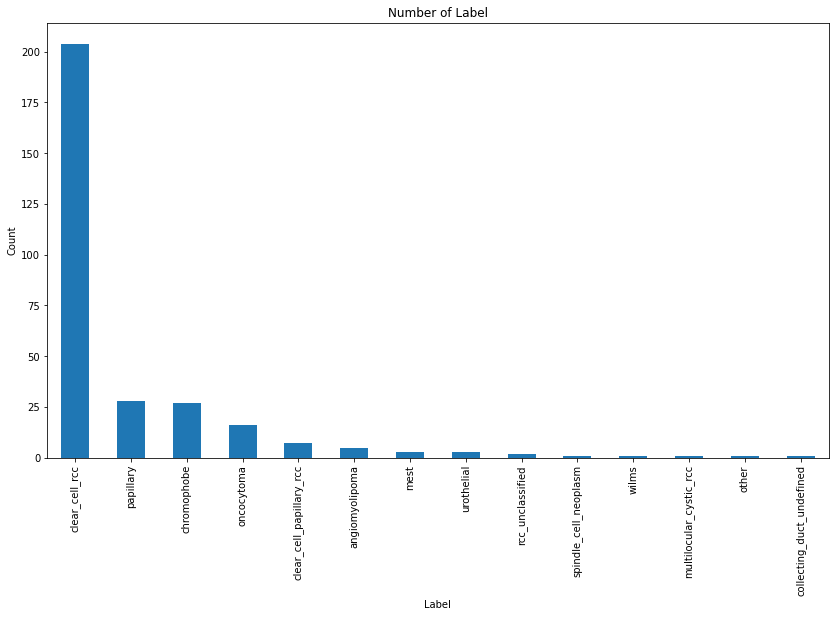

In [4]:
# Print the label distribution
df = pd.DataFrame(tumor_type, columns=['tumor_type'])

ax = df['tumor_type'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Label")
ax.set_xlabel("Label")
ax.set_ylabel("Count")

In [5]:
df = pd.read_csv("C:\\Users\\Gina\\Lab\\kidney\\radiomics\\result\\299_radiomics_feature.csv", index_col=0)

# drop useless columns
df = df.iloc[:, 37:]

In [9]:
wavelet_column = []
log_column = []

for item in df.columns:
    if 'wavelet' in item:
        wavelet_column.append(item)
    elif 'log' in item:
        log_column.append(item)

print('wavelet including 8 filter:', len(wavelet_column))
print('log including 5 params:', len(log_column))

wavelet including 8 filter: 744
log including 5 params: 465


In [14]:
print(wavelet_column[:5])
print(log_column[:5])

['wavelet-LLH_firstorder_10Percentile', 'wavelet-LLH_firstorder_90Percentile', 'wavelet-LLH_firstorder_Energy', 'wavelet-LLH_firstorder_Entropy', 'wavelet-LLH_firstorder_InterquartileRange']
['log-sigma-1-0-mm-3D_firstorder_10Percentile', 'log-sigma-1-0-mm-3D_firstorder_90Percentile', 'log-sigma-1-0-mm-3D_firstorder_Energy', 'log-sigma-1-0-mm-3D_firstorder_Entropy', 'log-sigma-1-0-mm-3D_firstorder_InterquartileRange']


ValueError: 'log-sigma-1-0' is not in list

In [10]:
# original image and features
df_original = df.drop(wavelet_column, axis=1)
df_original = df_original.drop(log_column, axis=1)

# log

In [103]:
df['tumor_type'] = tumor_type

# df = pd.concat([df, df[df['tumor_type'] == 'oncocytoma']], ignore_index = True)
# df = pd.concat([df, df[df['tumor_type'] == 'oncocytoma']], ignore_index = True)

# df = pd.concat([df, df[df['tumor_type'] == 'papillary']], ignore_index = True)
# df = pd.concat([df, df[df['tumor_type'] == 'papillary']], ignore_index = True)

# df = pd.concat([df, df[df['tumor_type'] == 'chromophobe']], ignore_index = True)
# df = pd.concat([df, df[df['tumor_type'] == 'chromophobe']], ignore_index = True)

label = df['tumor_type']
df = df.drop(columns='tumor_type')

train_X, test_X, train_y, test_y = train_test_split(df, label, test_size = 0.2)

In [18]:
train_X, test_X, train_y, test_y = train_test_split(df_original, tumor_type, test_size = 0.2)

Text(0, 0.5, 'Count')

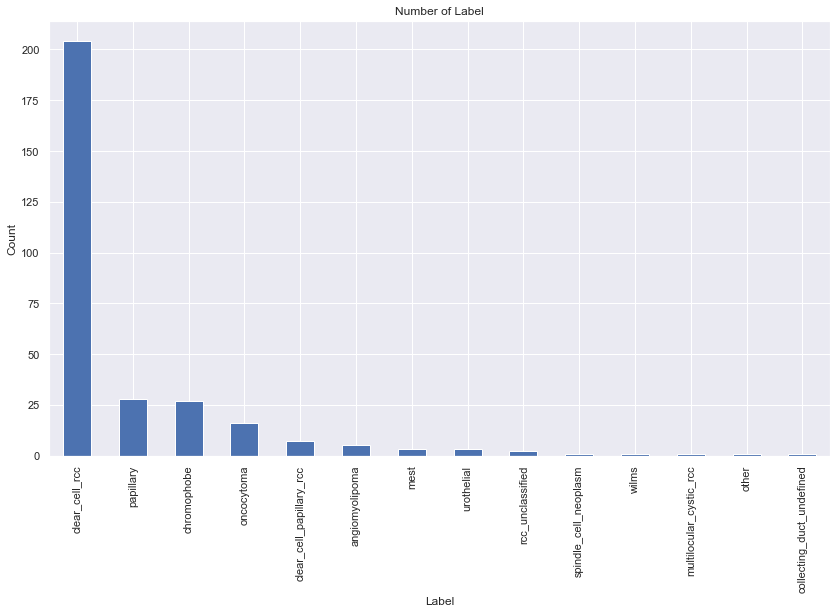

In [95]:
ax = label.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Label")
ax.set_xlabel("Label")
ax.set_ylabel("Count")

In [62]:
df.head(5)

,diagnostics_Mask-interpolated_Mean,diagnostics_Mask-interpolated_Minimum,diagnostics_Mask-interpolated_Maximum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,...,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,124.170685,-101.028512,316.028075,0.862742,0.760160,20.154583,26.513595,28.844410,28.017851,30.479501,...,0.056744,0.003653,0.243141,138.872941,0.001281,0.492637,0.002118,1332.393121,0.141763,1.236767
1,60.592328,-80.436897,216.034224,0.195262,0.155003,14.697807,94.822870,21.470911,25.942244,55.605755,...,0.178399,0.006561,0.147414,35.903653,0.001559,0.774044,0.002574,373.181512,0.041588,0.853819
2,47.754474,-75.035940,241.485063,0.891811,0.743956,31.774654,42.710380,47.169906,47.801674,47.127487,...,0.447999,0.008529,0.071891,14.242139,0.001250,4.385980,0.000390,405.355626,0.018624,0.224885
3,82.463608,-139.278478,254.741459,0.915818,0.870112,23.776610,27.325904,32.015621,30.364453,32.893768,...,0.078068,0.003506,0.154113,62.725981,0.000871,0.904840,0.001255,765.979214,0.049422,0.660940
4,67.915827,-106.557570,216.310714,0.749441,0.696361,26.762209,38.431538,44.721360,33.615473,44.283180,...,0.121453,0.003647,0.098878,30.431140,0.000734,1.587414,0.000810,467.936095,0.036467,0.355561


In [96]:
train_X, test_X, train_y, test_y = train_test_split(df, label, test_size = 0.2)

In [19]:
print('training data:', len(train_X))
print('testing data:', len(test_X))

training data: 240
testing data: 60


## SVC

In [20]:
clf = make_pipeline(SVC(gamma='auto')) # StandardScaler()
clf.fit(train_X, train_y)

clf_predict_y = clf.predict(test_X)

labels=['oncocytoma', 'other', 'multilocular_cystic_rcc',
        'mest', 'wilms', 'clear_cell_rcc',
        'clear_cell_papillary_rcc', 'chromophobe',
        'rcc_unclassified', 'collecting_duct_undefined',
        'spindle_cell_neoplasm', 'angiomyolipoma',
        'papillary', 'urothelial']

cf_matrix = confusion_matrix(test_y, clf_predict_y, labels=labels)
print(cf_matrix)

[[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 43  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]]


In [21]:
accuracy = metrics.accuracy_score(test_y, clf_predict_y)
print(accuracy)

print('confusion_matrix:\n', confusion_matrix(test_y, clf_predict_y, labels=labels))
print(labels)

0.7166666666666667
confusion_matrix:
 [[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 43  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]]
['oncocytoma', 'other', 'multilocular_cystic_rcc', 'mest', 'wilms', 'clear_cell_rcc', 'clear_cell_papillary_rcc', 'chromophobe', 'rcc_unclassified', 'collecting_duct_undefined', 'spindle_cell_neoplasm', 'angiomyolipoma', 'papillary', 'urothelial']


In [23]:
# default kernal is rbf
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

param_grid = [
    { 'kernel': ['poly'], 'degree': [3, 4, 5], 'coef0': [0, 1], 'gamma': ['scale', 'auto'] },
    { 'C': [0.5, 1, 1.5], 'gamma': ['scale', 'auto'] }
]

svc_clf = SVC()
grid_search = GridSearchCV(svc_clf, param_grid, cv=5,
                          scoring='accuracy')

grid_search.fit(train_X, train_y)

c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'coef0': [0, 1], 'degree': [3, 4, 5],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']},
                         {'C': [0.5, 1, 1.5], 'gamma': ['scale', 'auto']}],
             scoring='accuracy')

In [24]:
print('best params:', grid_search.best_params_)

best_svc_clf = grid_search.best_estimator_
best_predict_y = best_svc_clf.predict(test_X)

# evaluation
accuracy = metrics.accuracy_score(test_y, best_predict_y)
print('acc:', accuracy)

print('confusion_matrix:\n', confusion_matrix(test_y, best_predict_y, labels=labels))
print(labels)

best params: {'C': 0.5, 'gamma': 'scale'}
acc: 0.7166666666666667
confusion_matrix:
 [[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 43  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]]
['oncocytoma', 'other', 'multilocular_cystic_rcc', 'mest', 'wilms', 'clear_cell_rcc', 'clear_cell_papillary_rcc', 'chromophobe', 'rcc_unclassified', 'collecting_duct_undefined', 'spindle_cell_neoplasm', 'angiomyolipoma', 'papillary', 'urothelial']


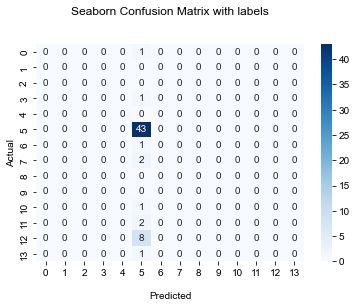

In [25]:
def plot_confusion(cf_matrix, labels):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    sns.set(rc={'figure.figsize':(12, 12)})

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted')
    ax.set_ylabel('Actual');

    ## Ticket labels - List must be in alphabetical order
    # ax.xaxis.set_ticklabels(labels)
    # ax.yaxis.set_ticklabels(labels)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

plot_confusion(cf_matrix, labels)

## Random Forest

In [26]:
forest = ensemble.RandomForestClassifier(n_estimators = 100)
forest_fit = forest.fit(train_X, train_y)

# predict
rf_predict_y = forest.predict(test_X)

# evaluation
accuracy = metrics.accuracy_score(test_y, clf_predict_y)
print(accuracy)

print('confusion_matrix:\n', confusion_matrix(test_y, clf_predict_y, labels=labels))
print(labels)

0.7166666666666667
confusion_matrix:
 [[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 43  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]]
['oncocytoma', 'other', 'multilocular_cystic_rcc', 'mest', 'wilms', 'clear_cell_rcc', 'clear_cell_papillary_rcc', 'chromophobe', 'rcc_unclassified', 'collecting_duct_undefined', 'spindle_cell_neoplasm', 'angiomyolipoma', 'papillary', 'urothelial']


## Grid Search for params

In [27]:
param_grid = [
    {'n_estimators': [10, 30, 100], 'max_depth': [5, 10, 20, None]}
]

forest_clf = ensemble.RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                          scoring='accuracy')

grid_search.fit(train_X, train_y)

c:\Users\Gina\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 20, None],
                          'n_estimators': [10, 30, 100]}],
             scoring='accuracy')

In [28]:
print('best params:', grid_search.best_params_)

best_rf = grid_search.best_estimator_
best_rf_predict_y = best_rf.predict(test_X)

# evaluation
accuracy = metrics.accuracy_score(test_y, best_rf_predict_y)
print('test acc:', accuracy)
print('train acc:', metrics.accuracy_score(train_y, best_rf.predict(train_X)))

print('confusion_matrix:\n', confusion_matrix(test_y, rf_predict_y, labels=labels))
print(labels)

best params: {'max_depth': 5, 'n_estimators': 30}
test acc: 0.7166666666666667
train acc: 0.8
confusion_matrix:
 [[ 0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 42  0  0  0  0  0  0  1  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]]
['oncocytoma', 'other', 'multilocular_cystic_rcc', 'mest', 'wilms', 'clear_cell_rcc', 'clear_cell_papillary_rcc', 'chromophobe', 'rcc_unclassified', 'collecting_duct_undefined', 'spindle_cell_neoplasm', 'angiomyolipoma', 'papillary', 'urothelial']


In [ ]:
# le = LabelEncoder()
# le.fit(train_y)
# print(le.classes_)
# encoded_train_y = le.transform(train_y)

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

# print(roc_auc_score(test_y_mapping, forest.predict_proba(test_X), multi_class='ovr'))
# fpr, tpr, threshold = roc_auc_score(test_y, rf_predict_y, multiclass='ovo')
# print(fpr, tpr, threshold)

# auc1 = auc(fpr, tpr)
# ## Plot the result
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()    


## Feature Selection for Random Forest

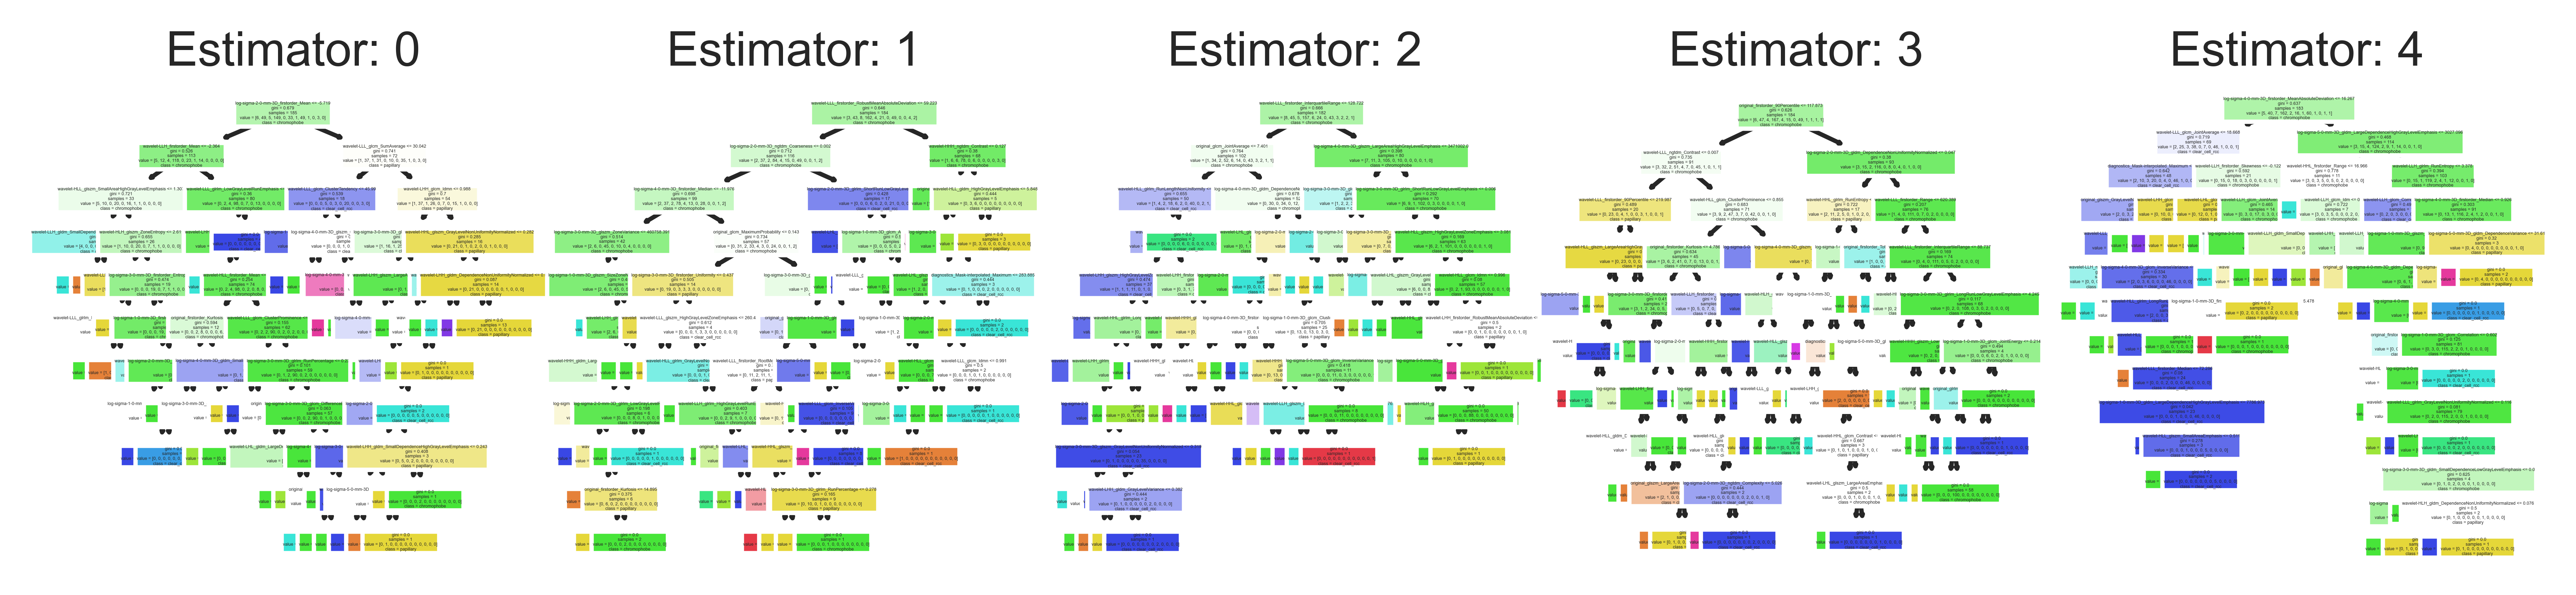

In [25]:
from sklearn import tree

# This may not the best way to view each estimator as it is small
fn=df.columns
cn=label
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(forest.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_individualtree.png')

In [ ]:
import xgboost as xgb
import numpy as np

clf1 = xgb.XGBClassifier()

param_dist = {
    'n_estimators': [80, 100, 150],
    'max_depth': [5, 10, 15],
    'learning_rate' : [0.01, 0.1, 0.5, 1],
    'subsample' : [0.7, 0.8, 0.9],
    'colsample_bytree' : [0.5, 0.7, 0.9],
    'min_child_weight' : [3, 5, 7]
}

grid_search = GridSearchCV(clf1, param_dist, cv = 5, scoring = 'accuracy')

grid_search.fit(train_X, train_y)

best_estimator = grid_search.best_estimator_

print(best_estimator)

print('best params:', grid_search.best_params_)

best_rf = grid_search.best_estimator_
best_rf_predict_y = best_rf.predict(test_X)

# evaluation
accuracy = metrics.accuracy_score(test_y, best_rf_predict_y)
print('acc:', accuracy)

print('confusion_matrix:\n', confusion_matrix(test_y, rf_predict_y, labels=labels))
print(labels)

# Conclusion
* Over-sampling for **oncocytoma**: 16', **chromophobe**: 27, **papillary**: 28 => Double these data
* Model:
    1. SVC
        * best params: {'C': 1, 'gamma': 'auto'}
        * acc: 0.9805825242718447
    2. Random Forest
        * best params: {'max_depth': None, 'n_estimators': 100}
        * acc: 0.9514563106796117